# Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

# 1. Camera calibration

* In order to calibaration a camera, I started by preparing " object point" and " img point", which will be the (x,y,z) coordnates of the chessboard corners in the world. Here 'imgpoints' is assumed as 2d which means the z axle is 0. I also counted the corner number in x axel named 'nx' and corner number in y axle is named ' ny'. Then I readed every images one by one to find corners by using the 'cv2.findChessboardCOrners'. With this way ,I found 'objpoints' and 'imgpoints'. 

In [3]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
nx = 9
ny = 6
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images
objpoints= []# 3d points in real world space
imgpoints= []# 2d points in image space

#make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

print('finished glob images name list')

#Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print(idx)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()

finished glob images name list
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


* After get 'objpoints' and 'imgpoints', I used 'cv2.calibrateCamera' function to find calibration parameters and saved them.

read test image
done calibration


Text(0.5,1,'Undistorted Image')

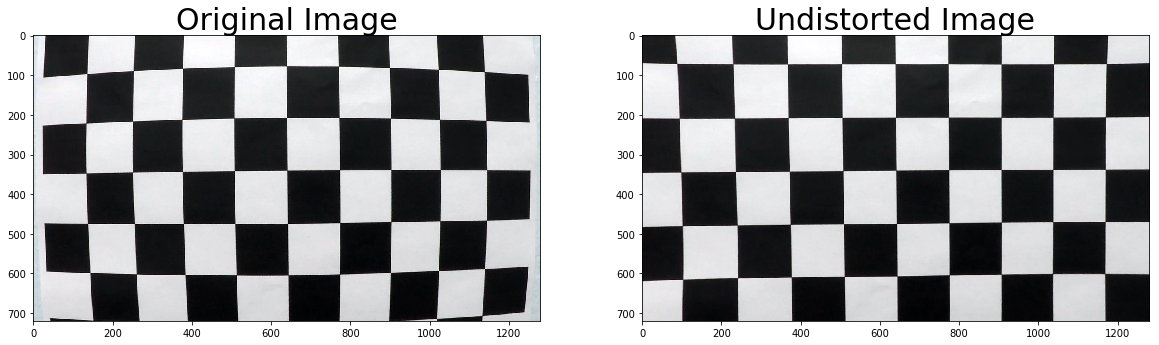

In [5]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('./camera_cal/test_image.jpg')
print('read test image')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
print('done calibration')

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle, open( "camera_cal/wide_dist_pickle.p", "wb" ) )

# Visualize the undistortion images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

* In order to confirm the results, I implement the calibration function to all the test images. The results is pretty good. 

In [6]:
# Step through the list and search for chessboard corners
# load pickled distortion matrix
import os
with open('./camera_cal/wide_dist_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    
# Visualize undistortion on test images
out_dir = 'output_images'
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name = os.path.split(fname)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)
    #cv2.imshow('dst', dst)
    #cv2.waitKey(500)
#cv2.destroyAllWindows()

output_imagesundistorted_calibration1.jpg
output_imagesundistorted_calibration10.jpg
output_imagesundistorted_calibration11.jpg
output_imagesundistorted_calibration12.jpg
output_imagesundistorted_calibration13.jpg
output_imagesundistorted_calibration14.jpg
output_imagesundistorted_calibration15.jpg
output_imagesundistorted_calibration16.jpg
output_imagesundistorted_calibration17.jpg
output_imagesundistorted_calibration18.jpg
output_imagesundistorted_calibration19.jpg
output_imagesundistorted_calibration2.jpg
output_imagesundistorted_calibration20.jpg
output_imagesundistorted_calibration3.jpg
output_imagesundistorted_calibration4.jpg
output_imagesundistorted_calibration5.jpg
output_imagesundistorted_calibration6.jpg
output_imagesundistorted_calibration7.jpg
output_imagesundistorted_calibration8.jpg
output_imagesundistorted_calibration9.jpg
